In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from aging.behavior.syllables import relabel_by_usage
from aging.organization.ontogeny import age_map_male
from aging.plotting import (
    format_plots,
    PlotConfig,
    save_factory,
    figure,
    legend,
    ONTOGENY_AGE_CMAP,
)

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "size-across-age", tight_layout=False)

In [3]:
version = 7
df = pd.read_parquet(
    f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_syllable_df_v00.parquet"
)
df, usage_map = relabel_by_usage(df)
df["age"] = df["age"].map(age_map_male).astype("int")

In [4]:
target_height = 670

In [5]:
df.head()

,experiment,file,syllables,date,uuid,age,true_depth,session_name,subject_name,timestamps,...,width_mm,width_px,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,relabeled_syllables
0,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,67,2021-11-18 12:57:43,3d2f89d8-0c8b-4bd1-8897-c1101db2dd96,9,643.5,ontogeny_cohorts_9wks,m15_b03_c01,0.000000,...,224.73172,141.401184,4.082169,0.0,11.175078,25.265911,19.810928,467.0,False,30
1,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,67,2021-11-18 12:57:43,3d2f89d8-0c8b-4bd1-8897-c1101db2dd96,9,643.5,ontogeny_cohorts_9wks,m15_b03_c01,0.033333,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
2,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,67,2021-11-18 12:57:43,3d2f89d8-0c8b-4bd1-8897-c1101db2dd96,9,643.5,ontogeny_cohorts_9wks,m15_b03_c01,0.066667,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
3,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,67,2021-11-18 12:57:43,3d2f89d8-0c8b-4bd1-8897-c1101db2dd96,9,643.5,ontogeny_cohorts_9wks,m15_b03_c01,0.100000,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
4,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,67,2021-11-18 12:57:43,3d2f89d8-0c8b-4bd1-8897-c1101db2dd96,9,643.5,ontogeny_cohorts_9wks,m15_b03_c01,0.133333,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30


In [6]:
scalars = (
    df.groupby(["age", "session_name", "uuid"], sort=False)
    .median(numeric_only=True)
    .reset_index()
)
scalars = scalars[scalars["velocity_2d_mm"] < 5]
# scalars["velocity_3d_mm"] *= 30
scalars = scalars[~scalars['session_name'].str.contains("CRL")]

In [7]:
ratio = (scalars['true_depth'] / 670)

In [8]:
for k in ("width_px", "area_px", "length_px"):
    if 'area' in k:
        scalars[f"rescaled_{k}"] = scalars[k] * ratio ** 2
    else:
        scalars[f"rescaled_{k}"] = scalars[k] * ratio

In [9]:
scalar_keys = [
    "rescaled_area_px",
    "rescaled_width_px",
    "rescaled_length_px",
    "height_ave_mm",
    "velocity_2d_mm",
    "recon_area",
    "recon_width",
    "recon_length",
    "recon_height",
]

In [10]:
variances = scalars.groupby('age').std(numeric_only=True)

In [11]:
means = scalars.groupby('age').mean(numeric_only=True)

In [12]:
variances

,syllables,true_depth,timestamps,raw_timestamps,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,...,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,relabeled_syllables,rescaled_width_px,rescaled_area_px,rescaled_length_px
age,,,,,,,,,,,,,,,,,,,,,
3,2.809953,12.286680,0.278267,963305.182457,37.510841,24.727095,34.842628,21.680857,32.966095,19.547977,...,0.017546,0.266465,0.982431,1.070398,10.224154,0.0,1.653280,0.450377,22.987410,1.410695
5,2.315707,12.111284,0.066686,960372.230258,63.058842,44.641487,26.633627,17.450846,39.585049,23.939739,...,0.023511,0.350842,0.635320,1.507043,10.552843,0.0,2.187083,0.814108,33.733105,1.222880
7,4.530912,12.134618,0.280890,707507.448944,74.652023,55.172306,28.703838,17.688250,24.259968,14.985046,...,0.061009,0.330930,1.585210,1.036061,25.305796,0.0,3.630886,0.667738,36.854153,1.724770
9,3.521363,12.243323,0.105077,706406.488160,55.683338,36.932369,24.209904,15.875348,26.771503,15.988057,...,0.038867,0.434279,1.004497,1.560511,15.690629,0.0,3.087610,0.614008,33.730846,1.649734
12,5.013088,10.396214,0.651532,470549.083083,75.735573,50.996510,27.824369,17.440931,23.235346,13.827987,...,0.047817,0.439980,1.135844,1.072008,15.859784,0.0,4.225819,0.930063,43.312450,1.956547
16,6.163062,2.256241,0.130735,40420.470350,42.898304,25.211687,20.818148,12.962078,16.755341,10.097021,...,0.044627,0.273753,1.388924,0.840513,14.379963,0.0,3.283799,0.669165,27.452440,1.552449
20,5.655381,2.274634,0.111040,40428.617968,54.462528,32.654758,25.177616,15.733443,26.541088,15.778539,...,0.046200,0.280343,1.266965,1.007232,13.485795,0.0,3.872445,0.735207,34.151169,1.415236
24,6.587070,7.932688,0.214032,410333.580244,51.805317,34.667965,28.418661,18.615034,31.149591,18.908504,...,0.022227,0.389721,1.637166,0.867206,22.134470,0.0,5.484993,0.758695,30.930262,1.786506
28,5.783597,2.274634,0.112013,40445.158565,55.994629,34.264111,31.274366,19.247047,34.306351,20.420862,...,0.032421,0.462006,2.037779,1.117473,17.967447,0.0,6.276942,0.803254,34.398170,2.154225


In [14]:
ex = variances[['rescaled_area_px', 'recon_area']].reset_index().melt(id_vars='age')

/tmp/ipykernel_1466/219446914.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])


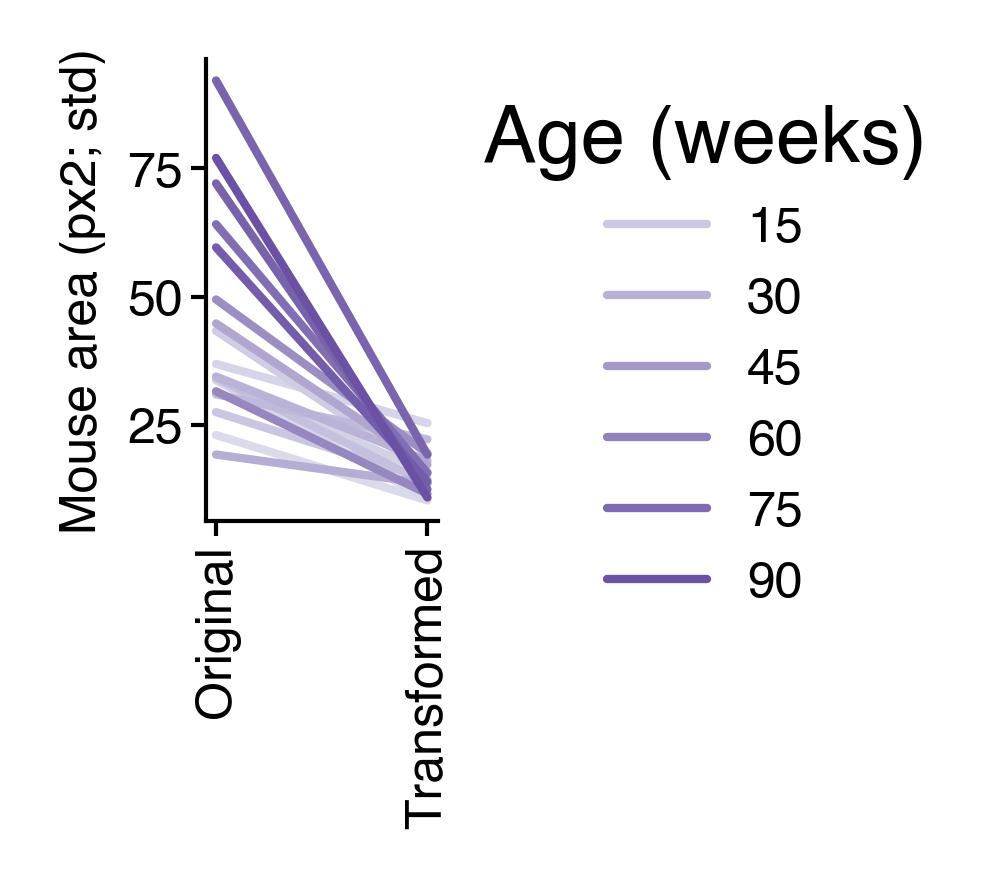

In [15]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-variability");

In [16]:
ex = means[['rescaled_area_px', 'recon_area']].reset_index().melt(id_vars='age')

In [17]:
mu = np.sqrt(means[['rescaled_area_px', 'recon_area']]) 

In [18]:
mu / mu.loc[12]

,rescaled_area_px,recon_area
age,,
3,0.758928,0.962146
5,0.886779,0.980682
7,0.949833,0.998441
9,0.938516,0.995675
12,1.000000,1.000000
16,0.987890,1.007069
20,1.007820,1.005672
24,1.075221,1.010606
28,1.016899,0.997303


/tmp/ipykernel_1466/1922211295.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])


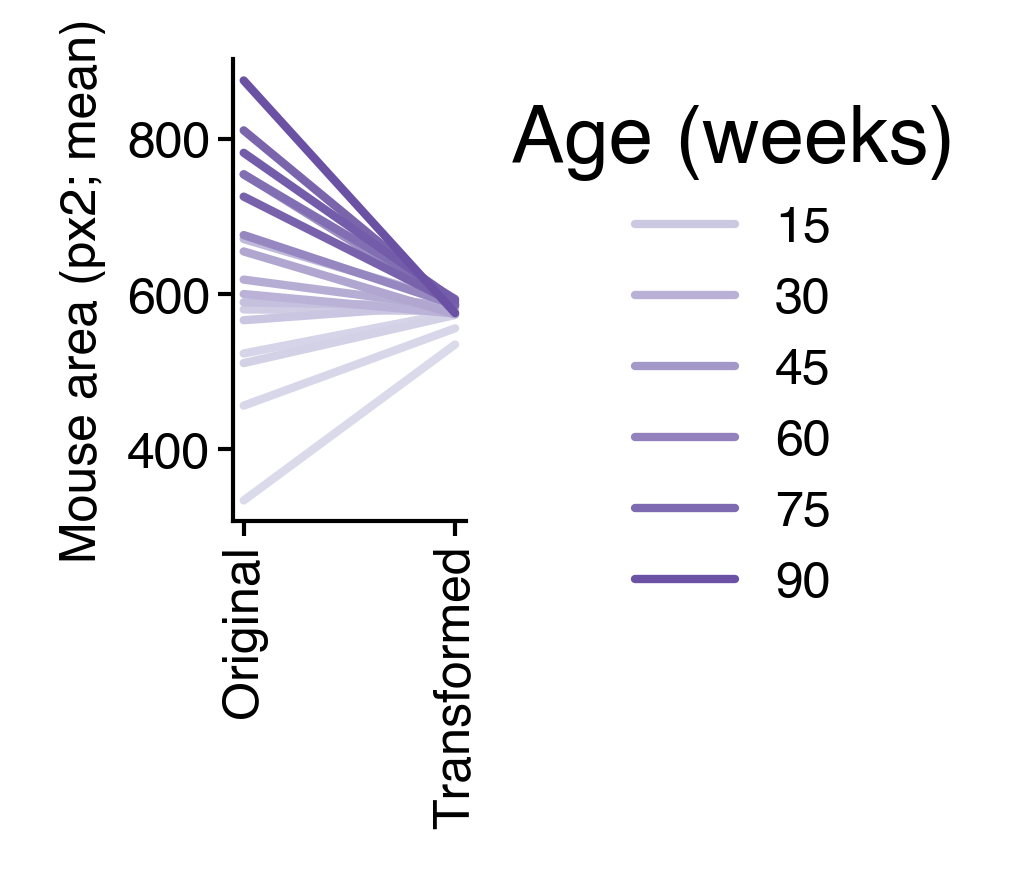

In [19]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-mean");

In [20]:
avg_scalars = scalars.groupby('age').mean(numeric_only=True)

In [22]:
boots = []
for i in tqdm(range(1_000)):
    boots.append(avg_scalars.sample(frac=1, replace=True).std()[['rescaled_area_px', 'recon_area']])
boots = pd.concat(boots).reset_index().rename(columns={0: 'std'})

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
boots

,index,std
0,rescaled_area_px,146.829745
1,recon_area,15.078519
2,rescaled_area_px,135.044789
3,recon_area,13.090186
4,rescaled_area_px,113.022744
...,...,...
1995,recon_area,15.821021
1996,rescaled_area_px,155.086466
1997,recon_area,13.463980
1998,rescaled_area_px,139.424105


/tmp/ipykernel_1466/693202860.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xlabel="", ylabel="Area (std)", xticklabels=["Original", "Transformed"])


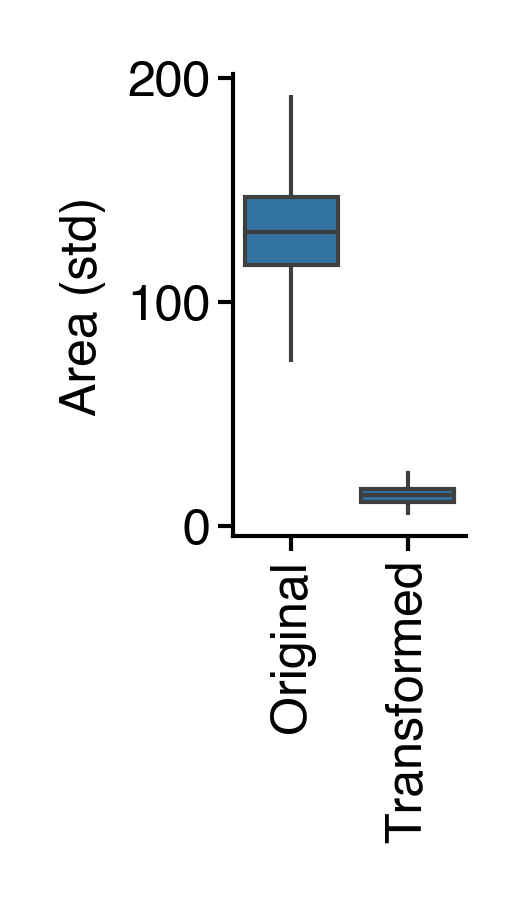

In [24]:
fig = figure(0.5, 1)
ax = sns.boxplot(
    data=boots, x="index", y="std", showcaps=False, showfliers=False, linewidth=0.5
)
ax.set(xlabel="", ylabel="Area (std)", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
sns.despine()
saver(fig, "inter-age-area-variability");

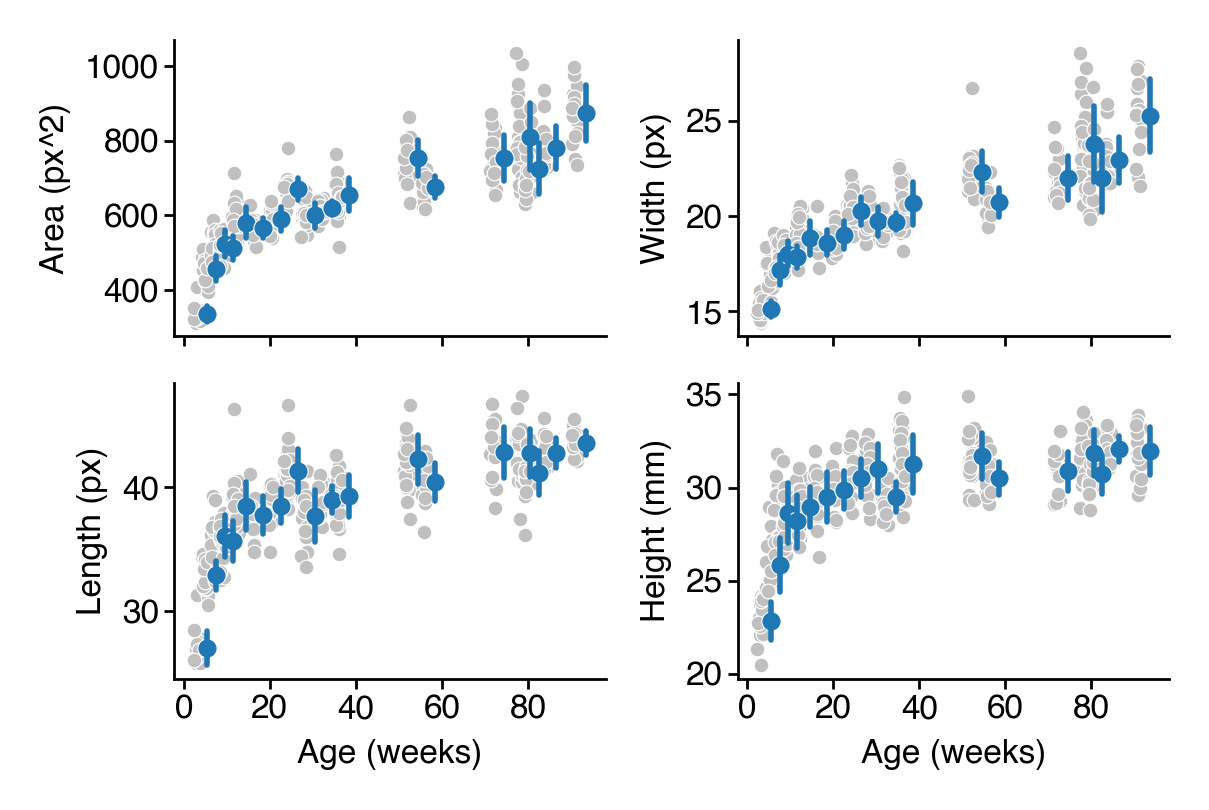

In [25]:
np.random.seed(0)
fig, ax = plt.subplots(2, 2, figsize=(3, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    a = sns.scatterplot(
        data=tmp,
        x="age",
        y=key,
        color="silver",
        ax=a,
        s=7,
    )
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, 'scalars-vs-age', tight_layout=True);

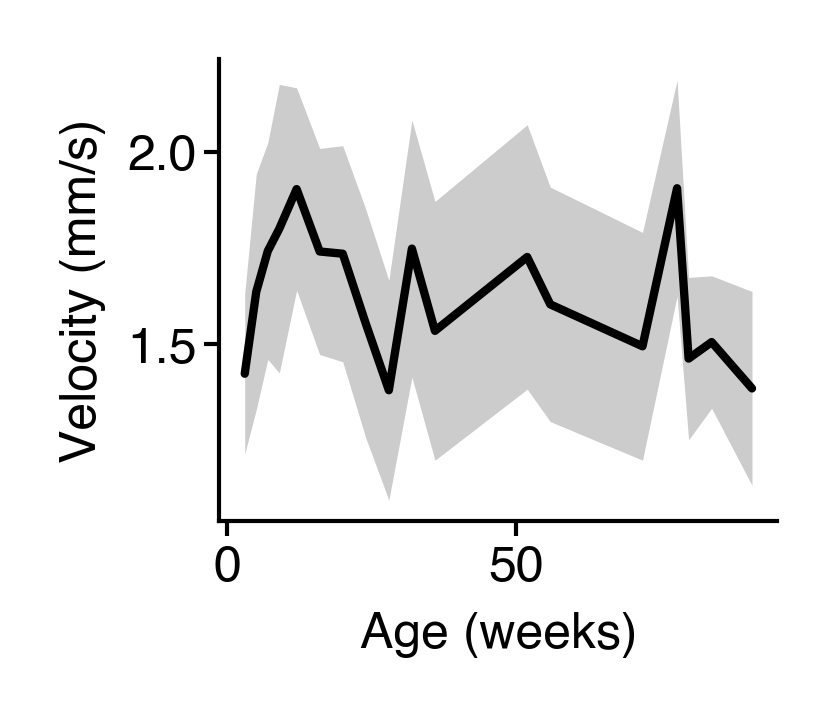

In [26]:
fig = figure(1.2, 1)
ax = sns.lineplot(data=scalars, x='age', y='velocity_3d_mm', err_kws=dict(lw=0), errorbar='sd', color='k')
ax.set(ylabel='Velocity (mm/s)', xlabel='Age (weeks)')
sns.despine()
# saver(fig, 'velocity-vs-age');

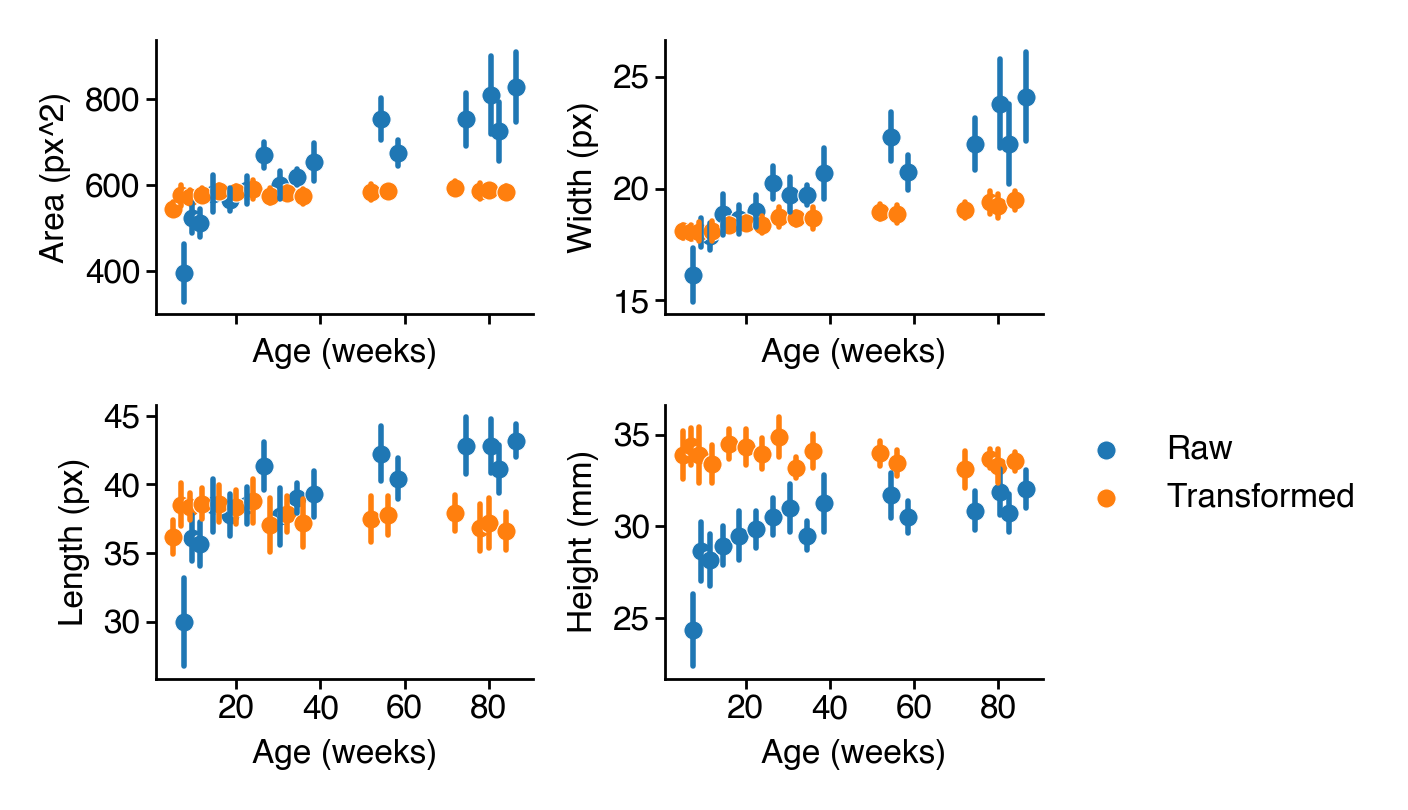

In [29]:
np.random.seed(0)
include_scatter = False
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
# tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if 'height' in key else key.split('_')[1]
    if include_scatter:
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=key,
            color="silver",
            ax=a,
            s=7,
        )
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=f'recon_{scalar_key}',
            color="silver",
            ax=a,
            s=7,
        )
        a.legend_.remove()
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Raw",
    )
    sns.regplot(
        data=tmp,
        x="age",
        y=f'recon_{scalar_key}',
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Transformed",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
legend(a)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, "scalars-vs-age-with-recon", tight_layout=True);

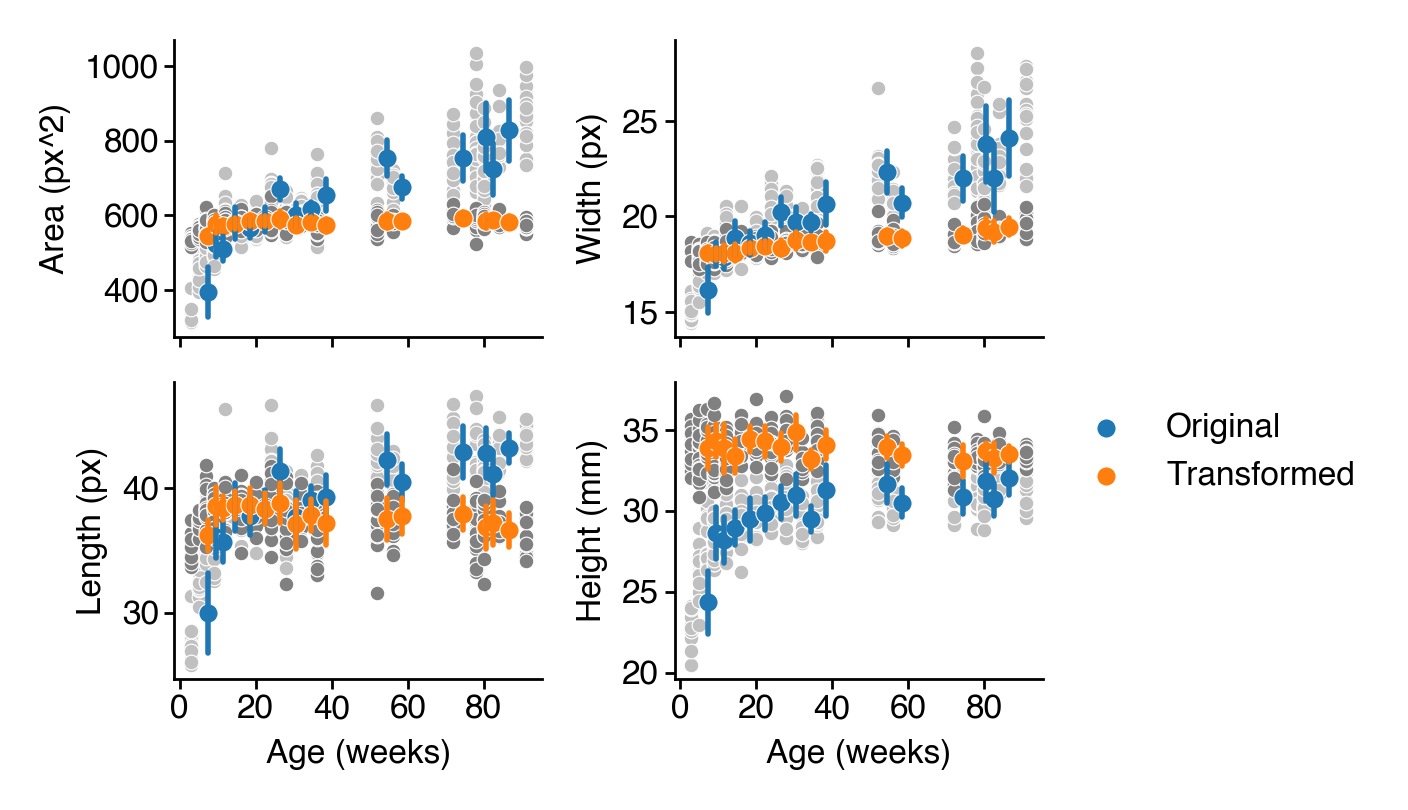

In [30]:
np.random.seed(0)
include_scatter = True
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
# tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if 'height' in key else key.split('_')[1]
    if include_scatter:
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=key,
            color="silver",
            ax=a,
            s=7,
        )
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=f'recon_{scalar_key}',
            color="gray",
            ax=a,
            s=7,
        )
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Original",
    )
    sns.regplot(
        data=tmp2,
        x="age",
        y=f'recon_{scalar_key}',
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Transformed",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
legend(a)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, "scalars-vs-age-with-recon", tight_layout=True);

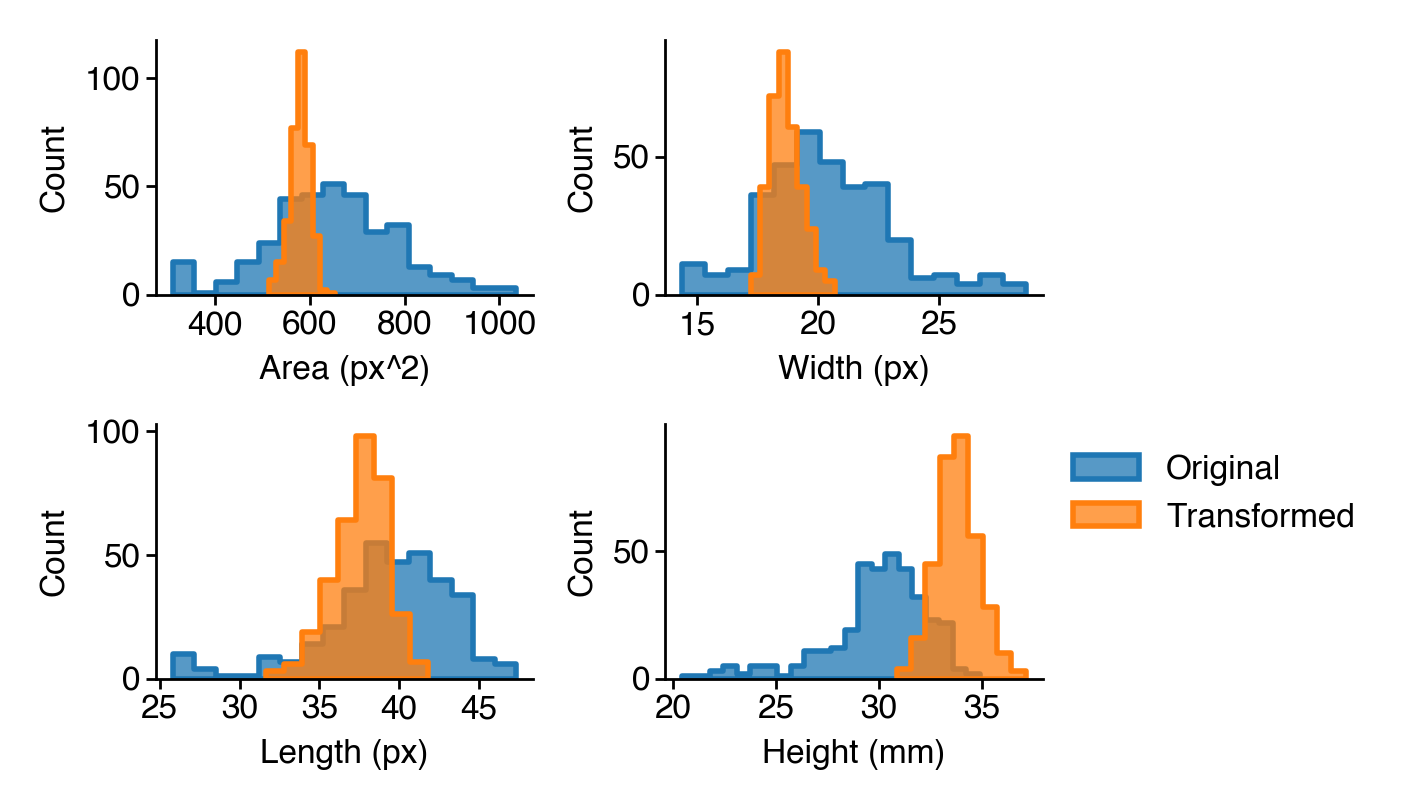

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if "height" in key else key.split("_")[1]
    a = sns.histplot(
        scalars[key], ax=a, color="C0", label="Original", element="step", lw=1
    )
    a = sns.histplot(
        scalars[f"recon_{scalar_key}"],
        ax=a,
        color="C1",
        label="Transformed",
        element="step",
        lw=1,
        bins=9,
    )

    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    a.set(xlabel=scalar_key.capitalize() + unit)
    a.locator_params(axis="x", nbins=6)
legend(a)
sns.despine()
saver(fig, "scalar-histplots", tight_layout=True);